# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [29]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode
import math

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [7]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length'] = df['title'].apply(len)
df.head()


,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12


In [11]:
# Calcula media, mediana y moda de la columna 'title_length'
media = df['title_length'].mean()
mediana = df['title_length'].median()
moda = df['title_length'].mode()[0]

print(f"Media: {media:.2f}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

Media: 15.48
Mediana: 14.0
Moda: 12


In [ ]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'

rango = df['title_length'].max() - df['title_length'].min()
varianza = df['title_length'].var()
desviacion_estandar = df['title_length'].std()

print(f"Rango: {rango}")
print(f"Varianza: {varianza:.2f}") #dos decimales
print(f"Desviación Estándar: {desviacion_estandar:.2f}")

Rango: 67
Varianza: 72.11
Desviación Estándar: 8.49


In [13]:
# Calcula asimetría y curtosis de la columna 'title_length'
asimetria = df['title_length'].skew()
curtosis = df['title_length'].kurtosis()


print(f"Asimetría: {asimetria:.2f}")
print(f"Curtosis: {curtosis:.2f}")

Asimetría: 1.53
Curtosis: 3.81


In [17]:
# Imprime el título más corto y el título más largo según su longitud

titulo_mascorto = df.loc[df['title_length'].idxmin(), 'title']
longitud_corta = df['title_length'].min()

titulo_maslargo = df.loc[df['title_length'].idxmax(), 'title']
longitud_larga = df['title_length'].max()

print(f"Título más corto: '{titulo_mascorto}' ({longitud_corta} caracteres)")
print(f"Título más largo: '{titulo_maslargo}' ({longitud_larga} caracteres)")

Título más corto: 'M' (1 caracteres)
Título más largo: 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb' (68 caracteres)


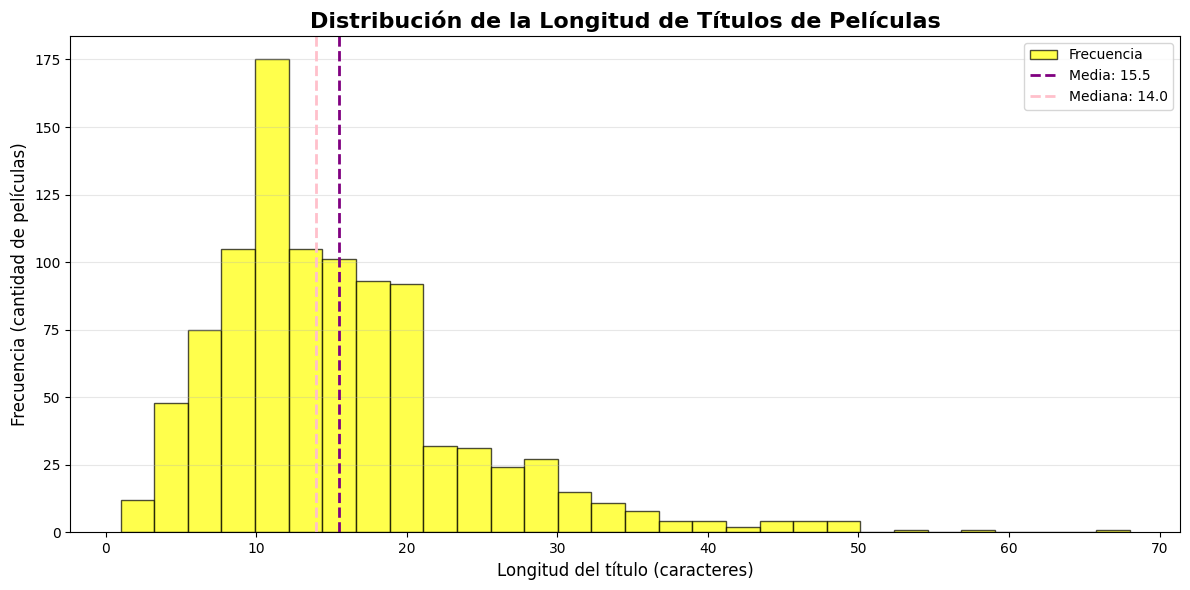

In [21]:
# grafica tus resultados
plt.figure(figsize=(12, 6))

# HISTOGRAMA
plt.hist(df['title_length'], bins=30, color='yellow', 
         edgecolor='black', alpha=0.7, label='Frecuencia')

# LÍNEAS VERTICALES para media y mediana
plt.axvline(media, color='purple', linestyle='--', 
            linewidth=2, label=f'Media: {media:.1f}')
plt.axvline(mediana, color='pink', linestyle='--', 
            linewidth=2, label=f'Mediana: {mediana}')

# Títulos y etiquetas
plt.title('Distribución de la Longitud de Títulos de Películas', 
          fontsize=16, fontweight='bold')
plt.xlabel('Longitud del título (caracteres)', fontsize=12)
plt.ylabel('Frecuencia (cantidad de películas)', fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [ ]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]

valores_reales = df["title_length"].head()
valores_reales.tolist() #convierte en lista


[24, 13, 22, 15, 12]

In [26]:
# Calcula la media de los 5 valores

media_valores = valores_reales.mean()
media_valores

np.float64(17.2)

In [27]:
# Calcula las diferencias al cuadrado con respecto a la media
diferencias_cuadrado = [(valor - media_valores) ** 2 for valor in valores_reales.tolist()]

print(f"Media: {media_valores:.2f}")
print(f"Lista original: {valores_reales.tolist()}")
print(f"Diferencias al cuadrado: {diferencias_cuadrado}")

Media: 17.20
Lista original: [24, 13, 22, 15, 12]
Diferencias al cuadrado: [np.float64(46.24000000000001), np.float64(17.639999999999993), np.float64(23.040000000000006), np.float64(4.839999999999997), np.float64(27.039999999999992)]


In [33]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación

varianza = math.sqrt(media_valores)

print(f"\nVarianza: {media_valores:.2f}")
print(f"Desviación estándar: {varianza:.2f}")


Varianza: 17.20
Desviación estándar: 4.15
